# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

import tensorflow as tf

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from keras.layers.core import Dense, Permute, Reshape
from keras.layers.convolutional import Convolution2D
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

In [4]:
global X, T
X=[]
T=[]

In [5]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [6]:
X,T = loaddata('punjabi.mat',0)

In [7]:
len(X), len(T)

(1405, 1405)

In [8]:
X,T = loaddata('malayalam.mat',1)

In [9]:
len(X), len(T)

(2973, 2973)

In [10]:
X,T = loaddata('bengali.mat',2)

In [11]:
len(X),len(T)

(4561, 4561)

## Split Dataset

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((3648, 39, 39), (913, 39, 39))

## Convert 2D dataset to a 1D vector

In [13]:
batchSize=128
num_classes=3
epochs=10
imageRows, imageCols =39,39

In [14]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [15]:
input_shape

(39, 39, 1)

In [16]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [17]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, activation="relu", padding="same", kernel_size=(3, 3), kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, activation="relu", padding="same", kernel_size=(3, 3), kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/home/shashank/.virtualenvs/keras_tf/lib/python3.5/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, a

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [19]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [20]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 3648 samples, validate on 913 samples
Epoch 1/10
3648/3648 [==============================] - 233s 64ms/step - loss: 2.5980 - acc: 0.6683 - val_loss: 2.7853 - val_acc: 0.6616
Epoch 2/10
3648/3648 [==============================] - 228s 62ms/step - loss: 2.0561 - acc: 0.8684 - val_loss: 2.0889 - val_acc: 0.8379
Epoch 3/10
3648/3648 [==============================] - 225s 62ms/step - loss: 1.7542 - acc: 0.9433 - val_loss: 1.8600 - val_acc: 0.8850
Epoch 4/10
3648/3648 [==============================] - 225s 62ms/step - loss: 1.5682 - acc: 0.9646 - val_loss: 1.8489 - val_acc: 0.8488
Epoch 5/10
3648/3648 [==============================] - 223s 61ms/step - loss: 1.4341 - acc: 0.9737 - val_loss: 1.4376 - val_acc: 0.9518
Epoch 6/10
3648/3648 [==============================] - 222s 61ms/step - loss: 1.3036 - acc: 0.9759 - val_loss: 2.6489 - val_acc: 0.6944
Epoch 7/10
3648/3648 [==============================] - 226s 62ms/step - loss: 1.2011 - acc: 0.9797 - val_loss: 1.2024 - val_acc: 0

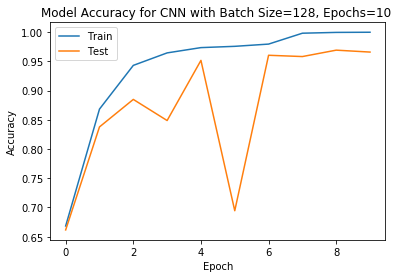

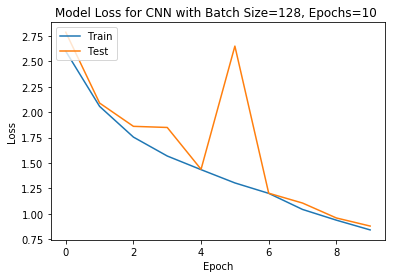

In [21]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [124]:
def ConfusionMatrix(actual,predicts,classes):
    nc=len(classes)
    confmat=np.zeros((nc,nc))
    for ri in range (nc):
        searchVal=np.zeros((1,nc))
        value=[]
        searchVal[0][ri]=1
        trueIndex=np.where((actual==searchVal).all(axis=1))
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=np.mean(value,axis=0)[rj]
    np.set_printoptions(formatter={'float': lambda confmat: "{0:0.5f}".format(confmat)})
    print(confmat)
    return

In [126]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,[0,1,2])

Confusion Matrix for Train Data
[[0.99139 0.00519 0.00341]
 [0.00174 0.98886 0.00939]
 [0.00017 0.00144 0.99838]]


In [127]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,[0,1,2])

Confusion Matrix for Test Data
[[0.96027 0.02585 0.01388]
 [0.00462 0.91324 0.08214]
 [0.00116 0.00972 0.98912]]
